# Results of different #agent values

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner','damage','num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,0.040204,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,0.151127,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,0.569797,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,1.508848,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,2.875129,34267.022912,400.0


In [27]:
planners_names = ['StaticLinePlanner', 'TravelingLinePlanner',
                  'SeparateTravelingPlanner', 'IterativeAssignmentPlanner', 'KmeansAssignmentPlanner']
# planners_names = ['High100TravelingLinePlanner', 'High2TravelingLinePlanner','TopDownScannerPlanner']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

StaticLinePlanner: 11
TravelingLinePlanner: 9
SeparateTravelingPlanner: 11
IterativeAssignmentPlanner: 11
KmeansAssignmentPlanner: 11


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
33,StaticLinePlanner,50,10.0,2.0,5.0,137.961109,0.003810,6784.673907,36.366667
34,StaticLinePlanner,100,10.0,2.0,5.0,146.770581,0.012463,13776.100341,74.566667
35,StaticLinePlanner,200,10.0,2.0,5.0,147.739585,0.066376,28064.752679,145.033333
36,StaticLinePlanner,300,10.0,2.0,5.0,151.659779,0.083284,42381.546181,221.533333
37,StaticLinePlanner,400,10.0,2.0,5.0,150.387738,0.108102,56181.084695,294.866667
38,StaticLinePlanner,500,10.0,2.0,5.0,151.162111,0.167955,70714.945249,367.333333
39,StaticLinePlanner,600,10.0,2.0,5.0,151.226635,0.269054,84355.905011,443.500000
40,StaticLinePlanner,700,10.0,2.0,5.0,151.895060,0.416999,98387.554114,519.133333
41,StaticLinePlanner,800,10.0,2.0,5.0,150.985235,0.544413,113048.363710,586.333333
42,StaticLinePlanner,900,10.0,2.0,5.0,153.040616,0.660498,127464.864138,665.466667


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

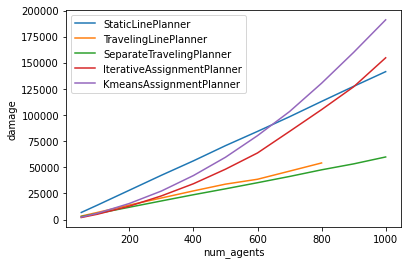

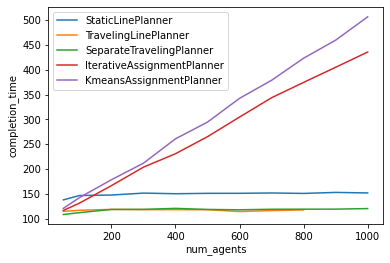

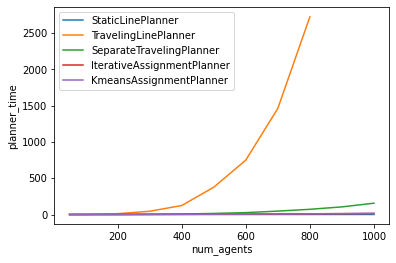

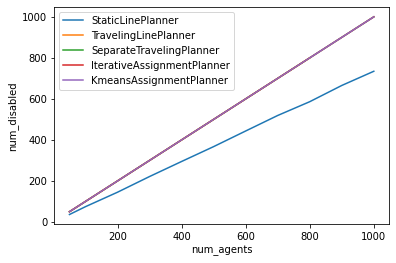

In [28]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]), list(r[y]))

    plt.legend(planners_names)
    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()